## Getting the data

!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


In [1]:
import pandas as pd
import numpy as np

## EDA

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:>

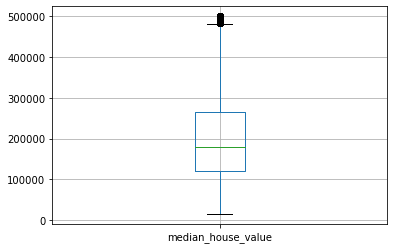

In [4]:
df.boxplot(column='median_house_value')

array([[<AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

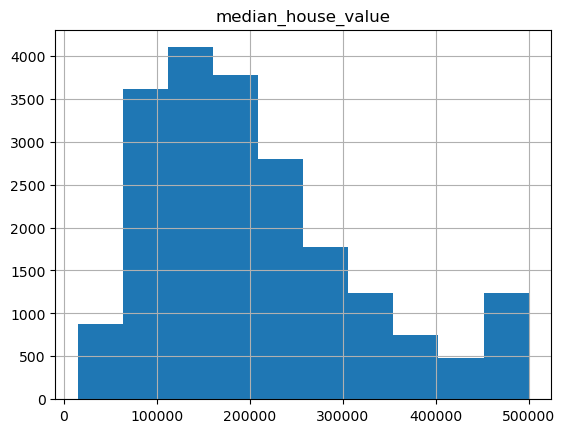

In [5]:
df.hist(column='median_house_value')

In [6]:
features = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income']
target = 'median_house_value'

## 1. Finding features with missing data

In [7]:
df[features].isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

## 2. Median

In [8]:
df["population"].median()

1166.0

## Splitting the data

In [9]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train =df[features].iloc[idx[:n_train]]
df_val =df[features].iloc[idx[n_train:n_train+n_val]]
df_test =df[features].iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df[target].iloc[idx[:n_train]].values)
y_val = np.log1p(df[target].iloc[idx[n_train:n_train+n_val]].values)
y_test = np.log1p(df[target].iloc[idx[n_train+n_val:]].values)


#from sklearn.model_selection import train_test_split
#X = df[features]
#y = df[target]
#X_train,X_val,y_train,y_val = train_test_split(X,y, train_size=0.6,test_size=0.4,random_state=42)
#X_val,X_test,y_val,y_test = train_test_split(X_val,y_val,test_size=0.5,random_state=42)
print("X_train: ", df_train.shape)
print("X_test: ", df_test.shape)
print("X_val: ", df_val.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print("y_val: ", y_val.shape)

X_train:  (12384, 8)
X_test:  (4128, 8)
X_val:  (4128, 8)
y_train:  (12384,)
y_test:  (4128,)
y_val:  (4128,)


In [10]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

## Filling missing data with mean and training

In [11]:
df_train.fillna(df_train.mean(),inplace=True)

In [12]:
df_train.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [13]:
#def dot(xi,w):
    #n = len(xi)
    #res = 0.0
    #for j in range(n):
    #   res = pred + xi[j] * w[j]
    #return res

def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


In [28]:
X_train = df_train.values
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_val.dot(w)

In [29]:
def rmse(y,y_pred):
    error = y-y_pred
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)

In [30]:
round(rmse(y_val,y_pred),2)

0.33

## Filling missing data with 0 and training

In [18]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train =df[features].iloc[idx[:n_train]]
df_val =df[features].iloc[idx[n_train:n_train+n_val]]
df_test =df[features].iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df[target].iloc[idx[:n_train]].values)
y_val = np.log1p(df[target].iloc[idx[n_train:n_train+n_val]].values)
y_test = np.log1p(df[target].iloc[idx[n_train+n_val:]].values)

In [19]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [20]:
df_train.fillna(0,inplace=True)

In [21]:
df_train.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [27]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

X_train = df_train.values
X_val = df_val.values
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + df_val.dot(w)

def rmse(y,y_pred):
    error = y-y_pred
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)

round(rmse(y_val,y_pred),2)

0.33

## Training regularized Linear regession

In [34]:
def train_linear_regression_reg(X,y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

X_train = df_train.values
X_val = df_val.values

r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in r_list:
    w0, w = train_linear_regression_reg(X_train,y_train,r)
    y_pred = w0 + X_val.dot(w)
    accuracy = round(rmse(y_val,y_pred),2)
    print("{}  --  {}".format(r,accuracy))

0  --  0.33
1e-06  --  0.33
0.0001  --  0.33
0.001  --  0.33
0.01  --  0.33
0.1  --  0.33
1  --  0.33
5  --  0.34
10  --  0.34


## Using different random seeds for splitting data

In [53]:
df = pd.read_csv("housing.csv")
features = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income']

target = 'median_house_value'

n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test
idx = np.arange(n)
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
score = {}
for n in seed_list:
    np.random.seed(n)
    np.random.shuffle(idx)
    df_train =df[features].iloc[idx[:n_train]]
    df_val =df[features].iloc[idx[n_train:n_train+n_val]]
    df_test =df[features].iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = np.log1p(df[target].iloc[idx[:n_train]].values)
    y_val = np.log1p(df[target].iloc[idx[n_train:n_train+n_val]].values)
    y_test = np.log1p(df[target].iloc[idx[n_train+n_val:]].values)
    df_train.fillna(0,inplace=True)
    X_train = df_train.values
    X_val = df_val.values
    w0, w = train_linear_regression(X_train,y_train)
    y_pred = w0 + df_val.dot(w)
    accuracy = round(rmse(y_val,y_pred),2)
    score[n] = accuracy


In [55]:
score

{0: 0.34,
 1: 0.34,
 2: 0.35,
 3: 0.34,
 4: 0.35,
 5: 0.34,
 6: 0.35,
 7: 0.34,
 8: 0.34,
 9: 0.34}

In [60]:
np.std(list(score.values()))

0.004582575694955819

## 6. Using 9 as seed and training with r = 0.001

In [69]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train =df[features].iloc[idx[:n_train]]
df_val =df[features].iloc[idx[n_train:n_train+n_val]]
df_test =df[features].iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df[target].iloc[idx[:n_train]].values)
y_val = np.log1p(df[target].iloc[idx[n_train:n_train+n_val]].values)
y_test = np.log1p(df[target].iloc[idx[n_train+n_val:]].values)
df_train.fillna(0,inplace=True)

X_train = df_train.values
X_val = df_val.values

w0, w = train_linear_regression_reg(X_train,y_train,r=0.001)
y_pred = w0 + df_val.dot(w)

print(round(rmse(y_val,y_pred),2))



0.34


# End